# Bài 2: Gradient Descent và Linear Regression

Trong bài thực hành này, chúng ta sẽ 
- giải linear regression bằng Gradient Descent


## 1. Gradient Descent

In [3]:
import pandas as pd
df = pd.read_csv("House_Price.csv")        ## load file csv vào pd.DataFrame

In [4]:
df                 ## xem thử DataFrame

,Size in feet squared,Price in thousand dollar
0,2497,729
1,1627,617
2,576,290
3,2156,728
4,1154,453
...,...,...
95,579,207
96,1551,368
97,2243,514
98,803,372


Text(0, 0.5, 'Price in thousand dollar')

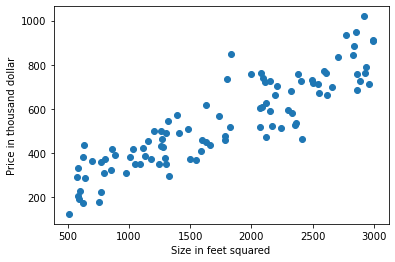

In [5]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

Bây giờ chúng ta muốn làm một bài toán dựa vào kích thước của ngôi nhà, đoán giá tiền

- $X$ = diện tích ngôi nhà

- $y$ = giá tiền (chưa biết, muốn dự đoán)

Ta giả thiết $\hat{y} = aX + b$  với $a$ và $b$ là số thực

Ta tìm $a$ và $b$ sao cho trung bình bình phương sai số nhỏ nhất khi đoán, tức là tìm $a$ và $b$ sao cho

$$ L = \frac{1}{n} \sum (y-\hat{y})^2 =  \frac{1}{n} \sum (y - aX - b)^2 $$

đạt giá trị nhỏ nhất, với $n$ là số mẫu.

Đặt $\lambda$ là learning rate, giá trị $a$ và $b$ sẽ được cập nhật theo công thức:

 - $a = a - \lambda \frac{\partial L}{\partial a} = a - \lambda \frac{\partial}{\partial a} \left( \frac{1}{n} \sum (y - aX - b)^2 \right)
= a - 2 \lambda  \frac{1}{n} \sum (y - aX - b) (-X) $

- $b = b - \lambda \frac{\partial L}{\partial b} = b - \lambda \frac{1}{n} \frac{\partial}{\partial b} \left( \sum (y - aX - b)^2 \right)
= b - 2 \lambda  \frac{1}{n} \sum (y - aX - b) (-1) $

Với $X$, $y$ là các ma trận với mỗi hàng là một sample. Tức là trong bài toán này, mỗi hàng của $X$ là diện tích của một căn nhà, tương ứng hàng của $y$ là giá của nhà đó.
Khi đó bài toán Linear Regression có thể code thành
```python
a = a - lmda * 2 *np.mean((y-a*X-b)*(-X))
a = a - lmda * 2 *np.mean((y-a*X-b)*(-1))
```

Cụ thể, bài toán được lập trình như sau

In [6]:
X = df['Size in feet squared'].values   
X = X.reshape(-1, 1)                   
y = df['Price in thousand dollar'].values 
y = y.reshape(-1,1)


In [7]:
import numpy as np

a, b = 1.0, 100.0           ## khởi tạo a, b

n_iter = 10000           ## số vòng lặp cập nhật a, b
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - a*X-b
    a = a - 2* lmda * np.mean(error*(-X))    ##cập nhật a và b
    b = b - 2* lmda * np.mean(error*(-1))
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - a*X-b))
        print("Loss at iter {}: {}".format(ii, loss))
loss = np.mean(np.square(y - a*X-b))
print("Final loss: ", loss)

Loss at iter 0: 163043.0689746898
Loss at iter 1000: 8650.560799446657
Loss at iter 2000: 8650.552741546615
Loss at iter 3000: 8650.544684154267
Loss at iter 4000: 8650.536627269585
Loss at iter 5000: 8650.528570892531
Loss at iter 6000: 8650.52051502308
Loss at iter 7000: 8650.512459661195
Loss at iter 8000: 8650.504404806845
Loss at iter 9000: 8650.496350459996
Final loss:  8650.488304674207


In [8]:
error.shape, X.shape

((100, 1), (100, 1))

Text(0, 0.5, 'Price in thousand dollar')

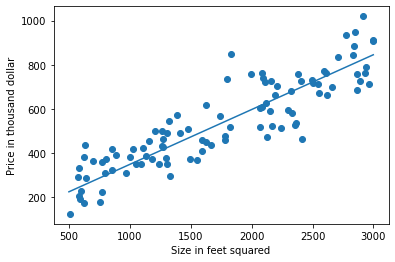

In [9]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), a*np.arange(500, 3000) + b)   ## vẽ solution tìm được
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

In [10]:
g_a, g_b = a, b

### Viết gọn hơn xíu

Cho $X$ là vector cột, $Z = (X, 1)$ là ma trận với 2 cột là $X$ và 1, khi đó $\hat{y} = aX + b =  Z \theta$ với $\theta = (a,b)^T$. Bài toán chuyển thành tìm $\theta$ sao cho

   $$ L = \frac{1}{n} ( y - Z \theta )^T ( y - Z \theta )$$
    
nhỏ nhất. Khi đó
$$ \frac{\partial L}{\partial \theta} = \frac{2}{n} (-Z)^T (y-Z \theta)
$$

In [11]:
X = df['Size in feet squared'].values   
X = X.reshape(-1, 1)                   
y = df['Price in thousand dollar'].values 
y = y.reshape(-1,1)


In [12]:
import numpy as np
Z = np.concatenate([X, np.ones((X.shape[0],1))], axis=-1) ## thêm một cột toàn số 1

In [16]:
theta = np.asarray([[1.0], [100.0]])     ## khởi tạo theta

n_iter = 10000           ## số vòng lặp cập nhật theta
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - np.matmul(Z, theta)
    theta =  theta - 2/Z.shape[0]*lmda*np.matmul(-Z.T, error)   ##cập nhật theta
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - np.matmul(Z, theta)))
        print("Loss at iter {}: {}".format(ii, loss))

loss = np.mean(np.square(y - np.matmul(Z,theta)))
print("Final loss: ", loss)
print("Final theta: ", theta)

Loss at iter 0: 163043.0689746897
Loss at iter 1000: 8650.560799446655
Loss at iter 2000: 8650.552741546615
Loss at iter 3000: 8650.544684154269
Loss at iter 4000: 8650.536627269585
Loss at iter 5000: 8650.528570892531
Loss at iter 6000: 8650.52051502308
Loss at iter 7000: 8650.512459661193
Loss at iter 8000: 8650.504404806845
Loss at iter 9000: 8650.496350459998
Final loss:  8650.488304674207
Final theta:  [[  0.24853945]
 [100.00861344]]


### 1.1 So sánh với exact solution và Sklearn

In [18]:

## exact solution
import numpy as np
Z = np.concatenate([X, np.ones((100,1))], axis=-1)   
Z = Z.astype(np.float64)       

## giá trị a và b tìm được
T = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)
e_a, e_b = T[0][0], T[1][0]
print(e_a, e_b)

0.23481102424914352 128.49450039983026


In [20]:
## SkLearn

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)                ## train LinearRegression 
sk_a, sk_b = lr.coef_[0][0], lr.intercept_[0]    ## lấy các tham số học được
print("a = {}, b = {}".format(sk_a, sk_b))

a = 0.23481102424914338, b = 128.49450039983003


In [21]:
print("GD MSE: ", np.mean(np.square(y - g_a*X-g_b)))
print("Exact SOl MSE: ", np.mean(np.square(y - e_a*X-e_b)))
print("SK MSE: ", np.mean(np.square(y - sk_a*X-sk_b)))

GD MSE:  8650.488304674207
Exact SOl MSE:  8522.66958807745
SK MSE:  8522.669588077448


Text(0, 0.5, 'Price in thousand dollar')

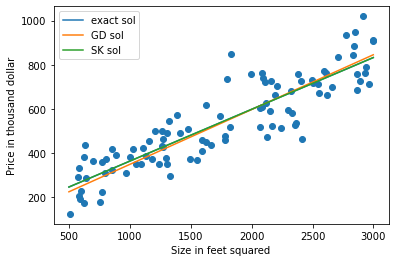

In [22]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), e_a*np.arange(500, 3000) + e_b, label="exact sol") 
plt.plot(np.arange(500, 3000), g_a*np.arange(500, 3000) + g_b, label="GD sol")   
plt.plot(np.arange(500, 3000), sk_a*np.arange(500, 3000) + sk_b, label="SK sol")   
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Bài tập
Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng với giả thuyết
$$ \text{giá} = a * \text{rộng} + b* \text{dài} + c , a, b, c \in \mathbb{R}$$
- Dùng Gradient Descent giải Linear Regression cho bài toán này 
    - khởi tạo tham số, chỉnh số vòng lặp và learning rate cho phù hợp
    - Hint:  để GD dễ hội tụ hơn nên Normalization input trước
- So sánh kết quả (MSE) với Exact Solution và kết quả từ Sklearn

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH2_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH2_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 23g59 thứ 3 ngày 02/06/2020. Nộp trễ bị chia đôi số điểm.

In [41]:
df = pd.read_csv("House_Price_2.csv")
df['size'] = df['width'] * df['length']
df

,width,length,price,size
0,28,97,3.350184e+08,2716
1,21,62,2.298295e+08,1302
2,27,64,2.603552e+08,1728
3,5,92,2.064708e+08,460
4,13,84,2.339808e+08,1092
...,...,...,...,...
95,23,94,3.055955e+08,2162
96,10,69,1.890808e+08,690
97,11,35,1.305380e+08,385
98,8,66,1.701948e+08,528


In [42]:
X = df['size'].values   
X = X.reshape(-1, 1)                   
y = df['price'].values 
y = y.reshape(-1,1)

In [43]:
import numpy as np

a, b = 1.0, 100.0           ## khởi tạo a, b

n_iter = 10000           ## số vòng lặp cập nhật a, b
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - a*X-b
    a = a - 2* lmda * np.mean(error*(-X))    ##cập nhật a và b
    b = b - 2* lmda * np.mean(error*(-1))
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - a*X-b))
        print("Loss at iter {}: {}".format(ii, loss))
loss = np.mean(np.square(y - a*X-b))
print("Final loss: ", loss)

Loss at iter 0: 2.381866497662581e+16
Loss at iter 1000: 3848179181240561.5
Loss at iter 2000: 3847762516604219.5
Loss at iter 3000: 3847345901109902.5
Loss at iter 4000: 3846929334751812.5
Loss at iter 5000: 3846512817524153.5
Loss at iter 6000: 3846096349421132.0
Loss at iter 7000: 3845679930436954.0
Loss at iter 8000: 3845263560565827.0
Loss at iter 9000: 3844847239801957.0
Final loss:  3844431384386692.0


In [44]:
error.shape, X.shape

((100, 1), (100, 1))

Text(0, 0.5, 'Price in thousand dollar')

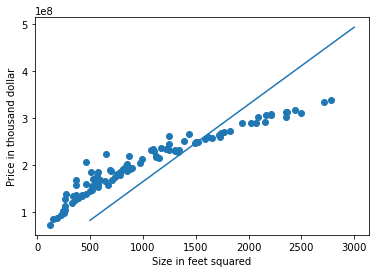

In [45]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["size"], df["price"])
plt.plot(np.arange(500, 3000), a*np.arange(500, 3000) + b)   ## vẽ solution tìm được
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

In [46]:
g_a, g_b = a, b

In [47]:
import numpy as np
Z = np.concatenate([X, np.ones((X.shape[0],1))], axis=-1)

In [48]:
theta = np.asarray([[1.0], [100.0]])     ## khởi tạo theta

n_iter = 10000           ## số vòng lặp cập nhật theta
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - np.matmul(Z, theta)
    theta =  theta - 2/Z.shape[0]*lmda*np.matmul(-Z.T, error)   ##cập nhật theta
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - np.matmul(Z, theta)))
        print("Loss at iter {}: {}".format(ii, loss))

loss = np.mean(np.square(y - np.matmul(Z,theta)))
print("Final loss: ", loss)
print("Final theta: ", theta)

Loss at iter 0: 2.3818664976625796e+16
Loss at iter 1000: 3848179181240560.0
Loss at iter 2000: 3847762516604221.0
Loss at iter 3000: 3847345901109903.5
Loss at iter 4000: 3846929334751812.5
Loss at iter 5000: 3846512817524153.5
Loss at iter 6000: 3846096349421132.0
Loss at iter 7000: 3845679930436955.0
Loss at iter 8000: 3845263560565827.0
Loss at iter 9000: 3844847239801958.0
Final loss:  3844431384386692.0
Final theta:  [[164418.91078793]
 [ 64746.87102926]]


In [49]:
## exact solution
import numpy as np
Z = np.concatenate([X, np.ones((100,1))], axis=-1)   
Z = Z.astype(np.float64)       

## giá trị a và b tìm được
T = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)
e_a, e_b = T[0][0], T[1][0]
print(e_a, e_b)

90823.55228030831 109463795.83086179


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)                ## train LinearRegression 
sk_a, sk_b = lr.coef_[0][0], lr.intercept_[0]    ## lấy các tham số học được
print("a = {}, b = {}".format(sk_a, sk_b))

a = 90823.5522803083, b = 109463795.83086176


In [51]:
print("GD MSE: ", np.mean(np.square(y - g_a*X-g_b)))
print("Exact SOl MSE: ", np.mean(np.square(y - e_a*X-e_b)))
print("SK MSE: ", np.mean(np.square(y - sk_a*X-sk_b)))

GD MSE:  3844431384386692.0
Exact SOl MSE:  315369404111040.25
SK MSE:  315369404111040.25


Text(0, 0.5, 'Price in thousand dollar')

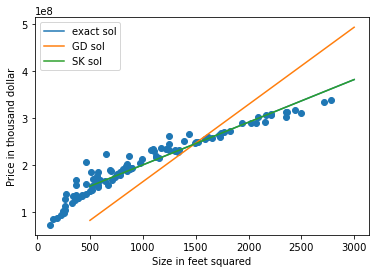

In [52]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["size"], df["price"])
plt.plot(np.arange(500, 3000), e_a*np.arange(500, 3000) + e_b, label="exact sol") 
plt.plot(np.arange(500, 3000), g_a*np.arange(500, 3000) + g_b, label="GD sol")   
plt.plot(np.arange(500, 3000), sk_a*np.arange(500, 3000) + sk_b, label="SK sol")   
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

University of Science, VNU Department of Computer Science Author: Nhut - Nam Le (Tich Phan Suy Rong)